# Import e funzioni ausiliarie

In [26]:
from tensorflow import keras as k
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
func = lambda x: x

In [28]:
x = np.linspace(0,15,100)
y = func(x)

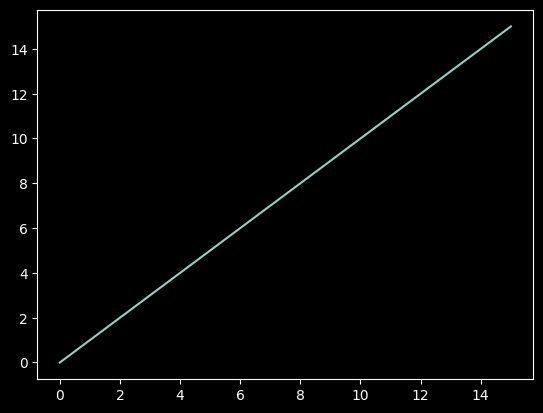

In [29]:
plt.plot(x,y)

In [30]:
def time_step(data, label, step=10):
    x,y = [],[]
    for i in range(data.shape[0]-(step+1)):
        x.append(data[i:i+step])
        y.append(label[i+1:i+step+1])
    return np.array(x),np.array(y)

In [31]:
xt,yt = time_step(x,y)
xt = xt.reshape(*xt.shape, 1)
yt = yt.reshape(*yt.shape, 1)

In [37]:
model = k.models.Sequential(
    [
        k.layers.Dense(300),
        k.layers.Dense(128)
    ]
)

In [38]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['mse']
)
model(xt)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (89, 10, 300)             600       
                                                                 
 dense_5 (Dense)             (89, 10, 128)             38528     
                                                                 
Total params: 39,128
Trainable params: 39,128
Non-trainable params: 0
_________________________________________________________________


In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(xt,yt,epochs=500, callbacks=[callback])

Epoch 1/500


2022-12-14 19:27:02.457097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 46ms/step - loss: 72.8924 - mse: 72.8924
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 71.8927 - mse: 71.8927
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 70.9527 - mse: 70.9527
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 70.0160 - mse: 70.0160
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 69.0639 - mse: 69.0639
Epoch 6/500
3/3 [==============================] - 0s 13ms/step - loss: 68.1791 - mse: 68.1791
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 67.2414 - mse: 67.2414
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 66.3065 - mse: 66.3065
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 65.4264 - mse: 65.4264
Epoch 10/500
3/3 [==============================] - 0s 9ms/step - loss: 64.5391 - mse: 64.5391
Epoch 11/500
3/3 [==============================] - 0s 11ms/step

3/3 [==============================] - 0s 7ms/step


2022-12-14 19:27:18.888127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


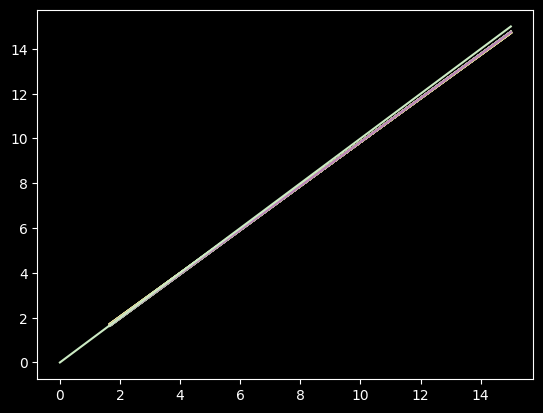

In [40]:
predicted = model.predict(xt)
plt.plot(x[11:], predicted[:, -1])
plt.plot(x,y)

313/313 [==============================] - 1s 4ms/step


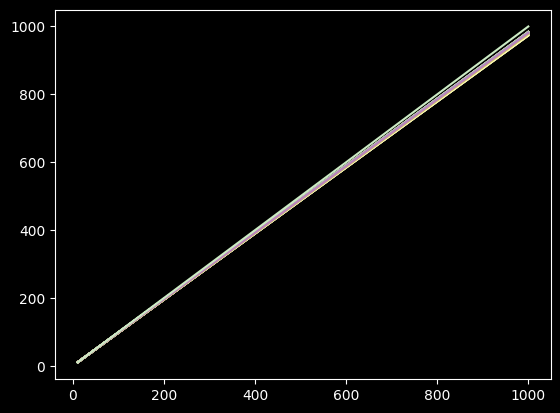

In [45]:
x_test = np.linspace(10,40,100)
y_test = func(x_test)
x_prova, y_prova = time_step(x_test,y_test)
x_prova = x_prova.reshape(*x_prova.shape, 1)
y_prova = y_prova.reshape(*y_prova.shape, 1)
model.evaluate(x_prova, y_prova)
predicted2 = model.predict(x_prova)
plt.plot(x_test[11:], predicted2[:, -1])
plt.plot(x_test,y_test)
